In [1]:
import pandas.io.sql as psql
import json
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
#from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import rdBase
from rdkit import DataStructs
#import psycopg2 as pg


import pandas as pd
import sqlalchemy as db
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
from pandas import concat

from collections import OrderedDict
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split

import cheminformatics.utils.multicore as multicore
import time
import math
from multiprocessing import Pool,Queue, Process, cpu_count
import os
import sys

import chemfp
from chemfp import search

import numpy as np

import random
from numpy import median 
from itertools import combinations

from rdkit.Chem import QED 

# novel7_elitist_pfam_novelty_parallel_1k_100_300_0randoms

In [2]:


evolution_scores = pd.read_csv("Results/saga_results/novel7_elitist_pfam_novelty_parallel_1k_100_300_0randoms/result_novel7_elitist_pfam_novelty_parallel_1k_100_300_0randoms.csv",encoding='utf-8')

In [3]:
evolution_scores['use'] = evolution_scores['generation'] % 10 ==0

In [4]:
print(evolution_scores.shape)
evolution_scores.head()

(30000, 3)


fitness  generation   use
0  0.935395           0  True
1  0.973327           0  True
2  0.923876           0  True
3  0.955176           0  True
4  0.950004           0  True

In [5]:
evolution_scores.tail()

fitness  generation    use
29995  1.287593         299  False
29996  1.320060         299  False
29997  1.158601         299  False
29998  1.312830         299  False
29999  1.296503         299  False

In [6]:
plot_evolution_scores = evolution_scores[evolution_scores.use]
plot_evolution_scores.head()

fitness  generation   use
0  0.935395           0  True
1  0.973327           0  True
2  0.923876           0  True
3  0.955176           0  True
4  0.950004           0  True

Text(0, 0.5, 'fitness')

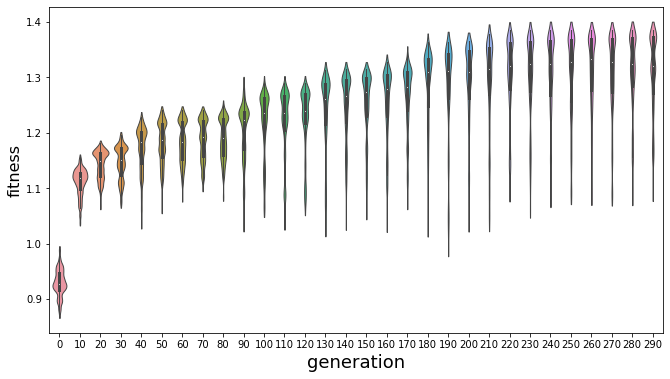

In [7]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))


ax = sns.violinplot(x="generation", y="fitness", data=plot_evolution_scores, bw=.2, cut=1, linewidth=1)

# Finalize the figure
plt.xlabel('generation', fontsize=18)
plt.ylabel('fitness', fontsize=16)


In [8]:
line_plot_evolution_scores = evolution_scores.groupby("generation")

line_plot_evolution_scores = line_plot_evolution_scores.max()

line_plot_evolution_scores = line_plot_evolution_scores.reset_index()

line_plot_evolution_scores

generation   fitness    use
0             0  0.990471   True
1             1  1.042033  False
2             2  1.048616  False
3             3  1.076388  False
4             4  1.087440  False
5             5  1.117646  False
6             6  1.136815  False
7             7  1.147328  False
8             8  1.147328  False
9             9  1.150655  False
10           10  1.155901   True
11           11  1.155901  False
12           12  1.169092  False
13           13  1.179342  False
14           14  1.179342  False
15           15  1.180677  False
16           16  1.180677  False
17           17  1.180677  False
18           18  1.180677  False
19           19  1.180677  False
20           20  1.180677   True
21           21  1.180677  False
22           22  1.180677  False
23           23  1.180677  False
24           24  1.192790  False
25           25  1.192790  False
26           26  1.192790  False
27           27  1.192790  False
28           28  1.194866  False
29           29  1.195225  False
..          ...       ...    ...
270         270  1.384710   True
271         271  1.384710  False
272         272  1.384710  False
273         273  1.384710  False
274         274  1.384710  False
275         275  1.384710  False
276         276  1.384710  False
277         277  1.384710  False
278         278  1.384710  False
279         279  1.385718  False
280         280  1.385718   True
281         281  1.385718  False
282         282  1.385718  False
283         283  1.385718  False
284         284  1.385718  False
285         285  1.385718  False
286         286  1.385718  False
287         287  1.385718  False
288         288  1.385718  False
289         289  1.385718  False
290         290  1.385718   True
291         291  1.385718  False
292         292  1.385718  False
293         293  1.385718  False
294         294  1.385718  False
295         295  1.385718  False
296         296  1.385718  False
297         297  1.385718  False
298         298  1.385718  False
299         299  1.385718  False

[300 rows x 3 columns]

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(data=evolution_scores, x="generation", y="fitness")

<AxesSubplot:xlabel='generation', ylabel='fitness'>

Text(0, 0.5, 'fitness')

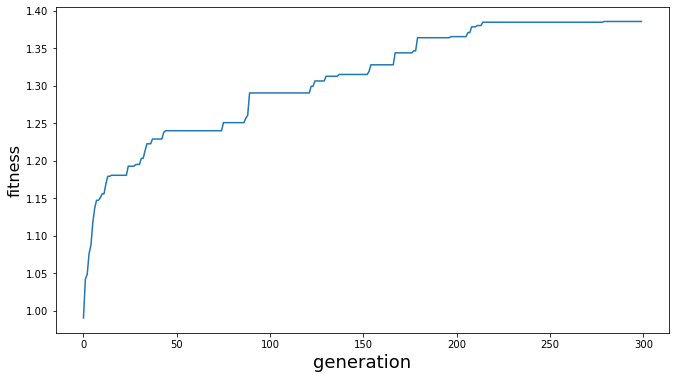

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(data=line_plot_evolution_scores, x="generation", y="fitness")
# Finalize the figure
plt.xlabel('generation', fontsize=18)
plt.ylabel('fitness', fontsize=16)

In [10]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.9904708500357808
max overall: 1.3857182710458682
improvement: 39.90500285756103


# novel7_elitist_pfam_novelty_parallel_1k_500_300_0randoms

In [11]:


evolution_scores = pd.read_csv("Results/saga_results/novel7_elitist_pfam_novelty_parallel_1k_500_300_0randoms/result_novel7_elitist_pfam_novelty_parallel_1k_500_300_0randoms.csv",encoding='utf-8')

In [12]:
evolution_scores['use'] = evolution_scores['generation'] % 10 ==0

In [13]:
print(evolution_scores.shape)
evolution_scores.head()

(150000, 3)


fitness  generation   use
0  0.900419           0  True
1  0.909883           0  True
2  0.934615           0  True
3  0.959020           0  True
4  0.968950           0  True

In [14]:
evolution_scores.tail()

fitness  generation    use
149995  1.354832         299  False
149996  1.458082         299  False
149997  1.388255         299  False
149998  1.348728         299  False
149999  1.372906         299  False

In [15]:
plot_evolution_scores = evolution_scores[evolution_scores.use]
plot_evolution_scores.head()

fitness  generation   use
0  0.900419           0  True
1  0.909883           0  True
2  0.934615           0  True
3  0.959020           0  True
4  0.968950           0  True

In [16]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))


ax = sns.violinplot(x="generation", y="fitness", data=plot_evolution_scores, bw=.2, cut=1, linewidth=1)

# Finalize the figure
plt.xlabel('generation', fontsize=18)
plt.ylabel('fitness', fontsize=16)


Text(0, 0.5, 'fitness')

In [17]:
line_plot_evolution_scores = evolution_scores.groupby("generation")

line_plot_evolution_scores = line_plot_evolution_scores.max()

line_plot_evolution_scores = line_plot_evolution_scores.reset_index()

line_plot_evolution_scores

generation   fitness    use
0             0  1.017651   True
1             1  1.037712  False
2             2  1.057139  False
3             3  1.088354  False
4             4  1.097038  False
5             5  1.132757  False
6             6  1.175031  False
7             7  1.211394  False
8             8  1.238083  False
9             9  1.238083  False
10           10  1.238083   True
11           11  1.255199  False
12           12  1.262053  False
13           13  1.286430  False
14           14  1.286430  False
15           15  1.322262  False
16           16  1.330734  False
17           17  1.337755  False
18           18  1.341725  False
19           19  1.358306  False
20           20  1.358306   True
21           21  1.358306  False
22           22  1.372904  False
23           23  1.372904  False
24           24  1.372904  False
25           25  1.388981  False
26           26  1.388981  False
27           27  1.388981  False
28           28  1.388981  False
29           29  1.388981  False
..          ...       ...    ...
270         270  1.475249   True
271         271  1.475249  False
272         272  1.475249  False
273         273  1.475249  False
274         274  1.475249  False
275         275  1.475249  False
276         276  1.475249  False
277         277  1.475249  False
278         278  1.475249  False
279         279  1.475249  False
280         280  1.475249   True
281         281  1.475249  False
282         282  1.475249  False
283         283  1.475249  False
284         284  1.475249  False
285         285  1.475249  False
286         286  1.475249  False
287         287  1.475249  False
288         288  1.475249  False
289         289  1.475249  False
290         290  1.475249   True
291         291  1.475249  False
292         292  1.475249  False
293         293  1.475249  False
294         294  1.475249  False
295         295  1.475249  False
296         296  1.475249  False
297         297  1.475249  False
298         298  1.475249  False
299         299  1.475249  False

[300 rows x 3 columns]

<AxesSubplot:xlabel='generation', ylabel='fitness'>

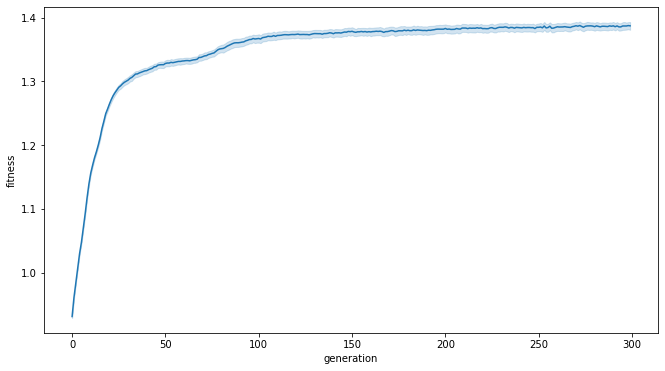

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(data=evolution_scores, x="generation", y="fitness")

Text(0, 0.5, 'fitness')

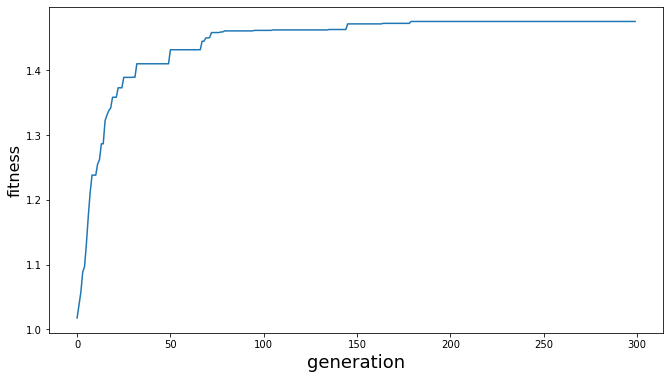

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(data=line_plot_evolution_scores, x="generation", y="fitness")
# Finalize the figure
plt.xlabel('generation', fontsize=18)
plt.ylabel('fitness', fontsize=16)

In [20]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 1.0176514385796454
max overall: 1.4752493489342082
improvement: 44.96607512226786


# novel7_elitist_pfam_novelty_parallel_5k_100_100_10randoms

In [2]:


evolution_scores = pd.read_csv("Results/saga_results/novel7_elitist_pfam_novelty_parallel_5k_100_100_10randoms/result_novel7_elitist_pfam_novelty_parallel_5k_100_100_10randoms.csv",encoding='utf-8')

In [3]:
print(evolution_scores.shape)
evolution_scores.head()

(10000, 2)


fitness  generation
0  0.594265           0
1  0.595807           0
2  0.597492           0
3  0.597984           0
4  0.591114           0

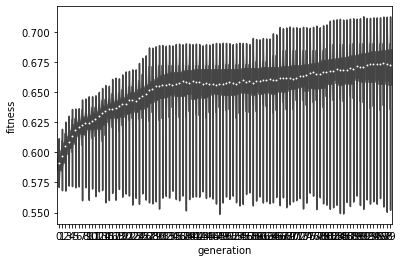

In [4]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [5]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.6072355434208363
max overall: 0.6900132168256543
improvement: 13.631888696516908


# novel7_elitist_pfam_novelty_parallel_10k_100_100_10randoms

In [6]:


evolution_scores = pd.read_csv("Results/saga_results/novel7_elitist_pfam_novelty_parallel_10k_100_100_10randoms/result_novel7_elitist_pfam_novelty_parallel_10k_100_100_10randoms.csv",encoding='utf-8')

In [7]:
print(evolution_scores.shape)
evolution_scores.head()

(10000, 2)


fitness  generation
0  0.433105           0
1  0.427463           0
2  0.432434           0
3  0.434603           0
4  0.433353           0

In [8]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [9]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.4443244423939256
max overall: 0.485275130992323
improvement: 9.216393403379701


# novel7_elitist_pfam_novelty_parallel_15k_100_100_10randoms

In [10]:


evolution_scores = pd.read_csv("Results/saga_results/novel7_elitist_pfam_novelty_parallel_15k_100_100_10randoms/result_novel7_elitist_pfam_novelty_parallel_15k_100_100_10randoms.csv",encoding='utf-8')

In [11]:
print(evolution_scores.shape)
evolution_scores.head()

(10000, 2)


fitness  generation
0  0.356212           0
1  0.359936           0
2  0.358229           0
3  0.355531           0
4  0.353139           0

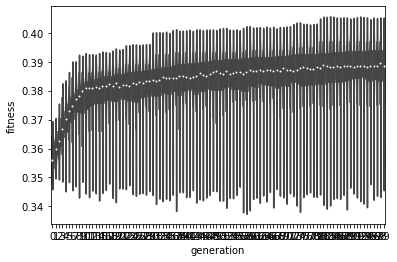

In [12]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [13]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.3667948267937383
max overall: 0.3966925112951823
improvement: 8.15106493261872


# 10k_100_100_10

In [6]:


evolution_scores = pd.read_csv("Results/novel5_elitist_pfam_novelty_10k_100_100_10randoms/result_novel5_elitist_pfam_novelty_10k_100_100_10randoms.csv",encoding='utf-8')

In [7]:
print(evolution_scores.shape)
evolution_scores.head()

(10000, 2)


fitness  generation
0  0.438992           0
1  0.435218           0
2  0.427695           0
3  0.432477           0
4  0.429017           0

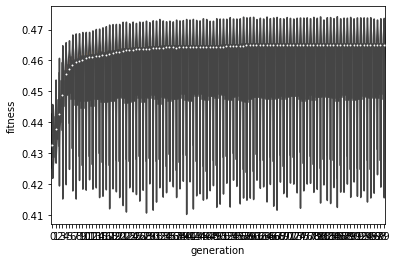

In [8]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [9]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.4426066456501512
max overall: 0.4649299956938005
improvement: 5.043609322869123


# 10k_100_100_15

In [10]:


evolution_scores = pd.read_csv("Results/novel5_elitist_pfam_novelty_10k_100_100_15randoms/result_novel5_elitist_pfam_novelty_10k_100_100_15randoms.csv",encoding='utf-8')

In [11]:
print(evolution_scores.shape)
evolution_scores.head()

(10000, 2)


fitness  generation
0  0.431248           0
1  0.426997           0
2  0.429923           0
3  0.434357           0
4  0.433093           0

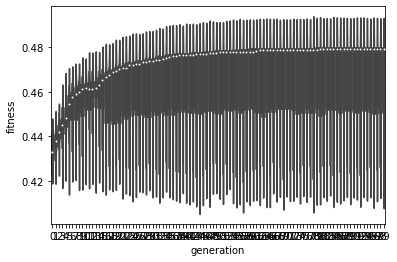

In [12]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [13]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.4445369085691167
max overall: 0.4791233987076162
improvement: 7.780341625586754


# 10k_100_100_25

In [14]:


evolution_scores = pd.read_csv("Results/novel5_elitist_pfam_novelty_10k_100_100_25randoms/result_novel5_elitist_pfam_novelty_10k_100_100_25randoms.csv",encoding='utf-8')

In [15]:
print(evolution_scores.shape)
evolution_scores.head()

(10000, 2)


fitness  generation
0  0.425458           0
1  0.430958           0
2  0.428985           0
3  0.438569           0
4  0.427247           0

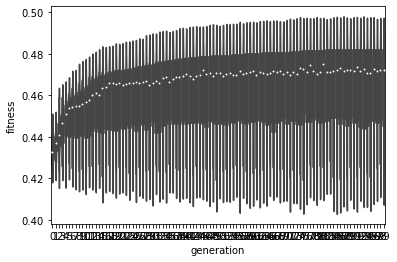

In [16]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [17]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.44775917171625895
max overall: 0.4811544336803288
improvement: 7.458308857430199


# 10k_100_100_50

In [18]:


evolution_scores = pd.read_csv("Results/novel5_elitist_pfam_novelty_10k_100_100_50randoms/result_novel5_elitist_pfam_novelty_10k_100_100_50randoms.csv",encoding='utf-8')

In [19]:
print(evolution_scores.shape)
evolution_scores.head()

(9300, 2)


fitness  generation
0  0.431444           0
1  0.434286           0
2  0.431627           0
3  0.437748           0
4  0.434714           0

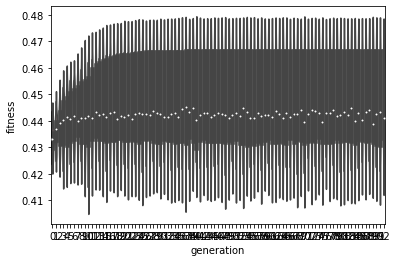

In [20]:
ax = sns.violinplot(x="generation", y="fitness", data=evolution_scores)

In [21]:
max_at_0 = evolution_scores[evolution_scores['generation']==0].fitness.max()
max_overall = evolution_scores.fitness.max()


print("max at 0:",max_at_0)
print("max overall:",max_overall)
print("improvement:",((max_overall-max_at_0)/max_at_0)*100 )

max at 0: 0.4434078084965111
max overall: 0.4663781011215025
improvement: 5.180398762682622
